In [13]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import quandl
quandl.ApiConfig.api_key = "32peB6ExRM7Lihbpsdsd"
import seaborn as sns
sns.set()
%matplotlib inline
#textblob to apply sentiment analysis 
from textblob import TextBlob
import preprocessor as p

In [14]:
#read the csv file containing tweets about 'Tesla'
tweets = pd.read_csv('../using_twint/tesla_tweets_3.csv', low_memory=False)
tweets = tweets[['date','tweet']]#Collapse dataframe to only the variables we want

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def VADER_compound_score(tweet):
    scores = analyser.polarity_scores(tweet)
    return scores['compound']

In [40]:
#get a particular tweet text
some_tweet = tweets.iloc[4551]['tweet']
VADER_compound_score(some_tweet)
#get the 'sentiment' of a particular tweet 
#scores = analyser.polarity_scores(some_tweet)
#print(scores, scores['compound'])
#print(analysis.sentiment)

0.6705

In [41]:
#tweets['subjectivity'] = tweets['tweet'].apply(lambda x:TextBlob(x).subjectivity)
tweets['tweet_clean'] = tweets['tweet'].apply(lambda x:p.clean(x))
tweets['polarity'] = tweets['tweet_clean'].apply(lambda x:VADER_compound_score(x))#p.clean() removes links, emojis, hastags

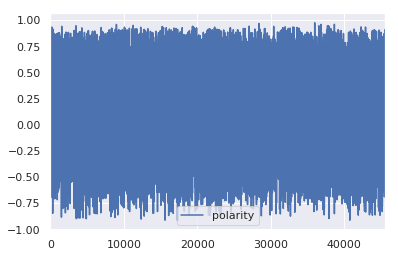

In [51]:
tweets[['date','polarity']].plot()

In [52]:
#covert the date column to datetime type
tweets.date = pd.to_datetime(tweets.date)
#append weekofyear, weekday, year based on date, 0=Mon, 6=Sun
tweets['weekofyear'] = tweets['date'].dt.weekofyear
tweets['weekday'] = tweets['date'].dt.weekday
tweets['year'] = tweets['date'].dt.year

In [53]:
columns = ['polarity', 'weekofyear']
weekly_pol = tweets.loc[tweets['year'] == 2015, columns].groupby('weekofyear').mean()
weekly_pol = weekly_pol[:-1]

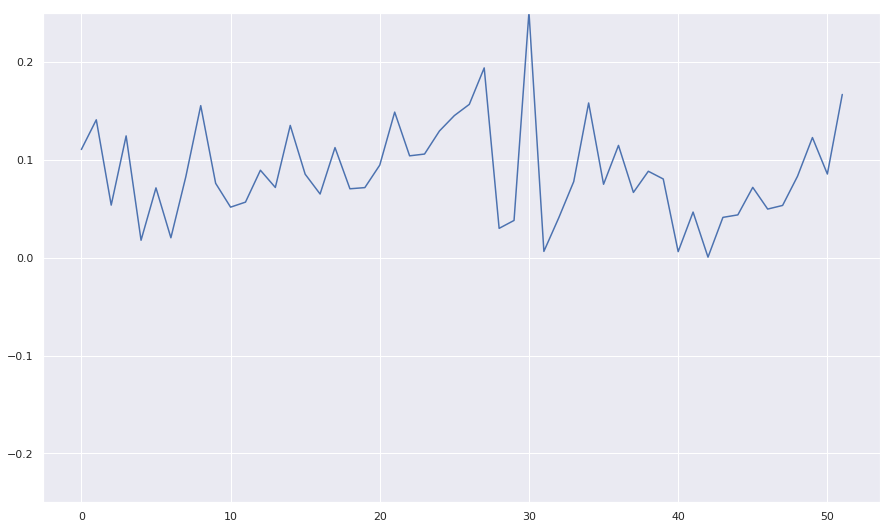

In [54]:
#plot the weekly average sentiment for 2015
pylab.rcParams['figure.figsize'] = (15, 9)
plt.ylim(-0.25, 0.25)
plt.plot(np.arange(0,52), weekly_pol['polarity'])

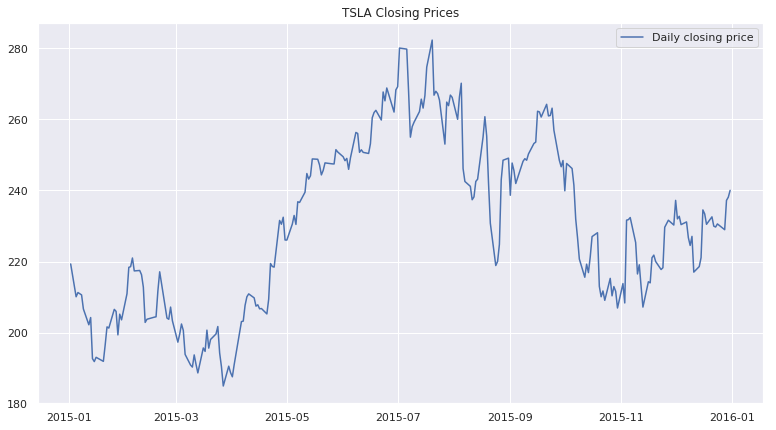

In [55]:
#get the weekly percent difference in the stock prices 
start = datetime.datetime(2015,1,1) # Beginning of period 
end = datetime.datetime(2016,1,1) # End of period 
stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start, end_date=end)
pylab.rcParams['figure.figsize'] = (13, 7)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.legend()
plt.show()

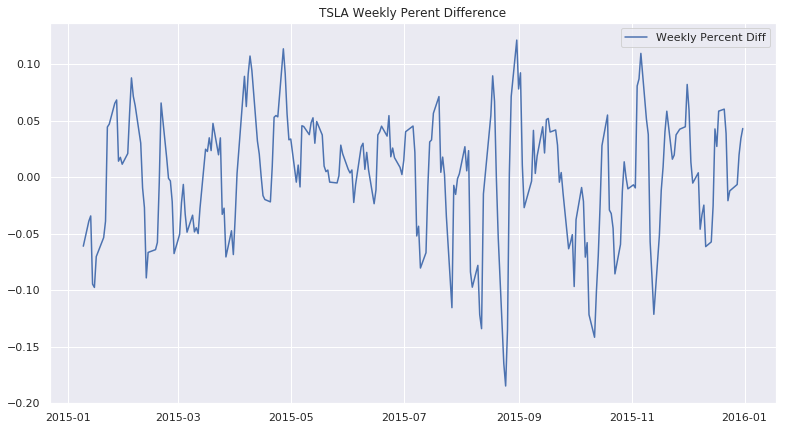

In [56]:
#get the weekly percent difference in the stock price
data["WeekPercDiff"] = data["Close"].diff(periods=5) / data["Close"]
plt.title(stock + " Weekly Perent Difference")
plt.plot(data["WeekPercDiff"],label="Weekly Percent Diff") # plot daily closing prices 
plt.legend()
plt.show()

In [57]:
data['weekofyear'] = data.index.weekofyear
data['weekday'] = data.index.weekday
data['year'] = data.index.year

In [58]:
#get price percent differences on fridays (weekday == 4)
wed_stocks = data.loc[data['weekday'] == 2]
wed_stocks.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,WeekPercDiff,weekofyear,weekday,year
Date,,,,,,,,,,,,,,,,
2015-01-07,213.35,214.780,209.78,210.95,2968390.0,0.0,1.0,213.35,214.780,209.78,210.95,2968390.0,NaN,2,2,2015
2015-01-14,185.83,195.200,185.00,192.69,11551855.0,0.0,1.0,185.83,195.200,185.00,192.69,11551855.0,-0.094764,3,2,2015
2015-01-21,189.55,198.680,189.51,196.57,4153043.0,0.0,1.0,189.55,198.680,189.51,196.57,4153043.0,-0.039070,4,2,2015
2015-01-28,206.11,206.368,198.42,199.37,3149606.0,0.0,1.0,206.11,206.368,198.42,199.37,3149606.0,0.014044,5,2,2015
2015-02-04,218.29,221.479,216.80,218.55,3305377.0,0.0,1.0,218.29,221.479,216.80,218.55,3305377.0,0.087760,6,2,2015


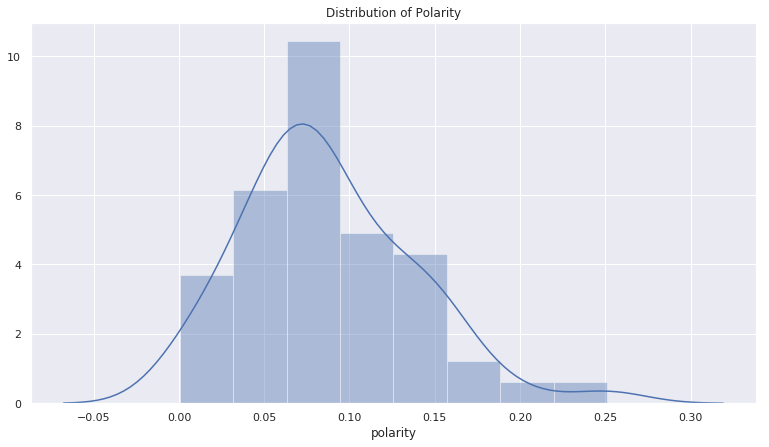

In [70]:
plt.title("Distribution of Polarity")
plt.xlabel("Polarity")
#plt.hist(weekly_pol['polarity'])
sns.distplot(weekly_pol['polarity'])
plt.show()

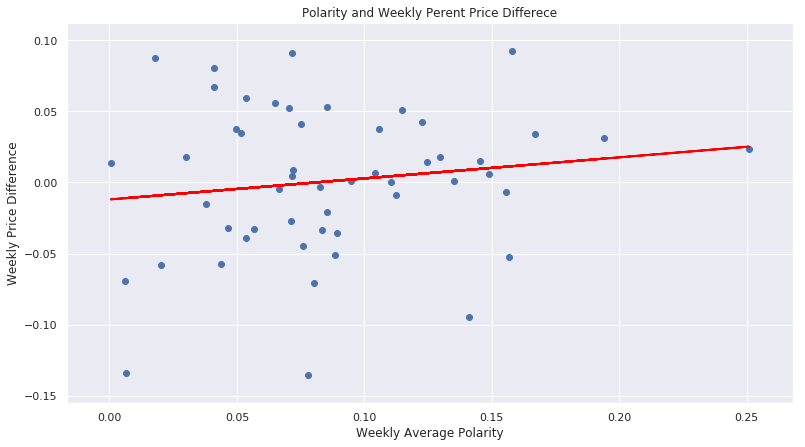

In [71]:
plt.title("Polarity and Weekly Perent Price Differece")
plt.xlabel('Weekly Average Polarity')
plt.ylabel('Weekly Price Difference')
plt.scatter(weekly_pol['polarity'], wed_stocks["WeekPercDiff"])
plt.plot( weekly_pol['polarity'], lm.predict(weekly_pol[['polarity']]), color='red', linewidth=2 )


In [72]:
 from sklearn.model_selection import KFold
model = LinearRegression()
scores = []

X = weekly_pol[['polarity']]
y = wed_stocks["WeekPercDiff"]
model.fit(X,y)
model.score(X,y)


# kf = KFold(n_splits=1, shuffle=True, random_state=1)
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     model.fit(X, Y)
#     score = model.score(X_test, y_test)
#     scores.append(score)

# scores

0.02065342590564967